# Introduction to cloud-optimized bioimaging with OME-Zarr

## Authors & Contributors
### Authors
- Anne Fouilloux, Simula (Norway), [@annefou](https://github.com/annefou)

### Contributors
- Josh Moore,  Open Microscopy Enviroment (OME), Germany,  [@joshmoore](https://github.com/joshmoore)

### Associated publication
```{bibliography}
  :style: plain
  :list: bullet
  :filter: topic % "joshmoore2023"
```


<div class="alert alert-info">
<i class="fa-question-circle fa" style="font-size: 22px;color:#666;"></i> Overview
    <br>
    <br>
    <b>Questions</b>
    <ul>
        <li>What are NGFF and OME-zarr?</li>
        <li>How do I read and write OME-Zarr?</li>
        <li>How do I use Xarray with multiscale OME-Zarr?</li>
    </ul>
    <b>Objectives</b>
    <ul>
        <li>Learn about NGFF and OME-Zarr</li>
        <li>Learn about using Xarray with OME-Zarr</li>
    </ul>
</div>

## Context

[NGFF](https://ngff.openmicroscopy.org/latest/) (Next-generation file formats) is a community driven effort to develop standardized data formats for microscopy that are performant and cloud ready. The primary format is [ome.zarr](https://ngff.openmicroscopy.org/latest/), which is based on the popular [zarr](https://zarr.readthedocs.io/en/stable/) n-dimensonial array data format. The development effort is ongoing, but the specification for n-dimensional image data is already present and ready for use. For more information check out the published paper.

Two python packages exist to make life easier for python developers working with the ome.zarr data format:

- https://github.com/ome/ome-zarr-py for reading, writing and other functionality
- https://github.com/ome/napari-ome-zarr for displaying ome.zarr files in napari.

In this notebook, we will use them to create data in the ome.zarr format, read it back into memory, display it with napari and explore additional functionality.



### Background information

If you are interested to learn more about OME-Zarr, we encourage you to read the associated paper: **OME-Zarr: a cloud-optimized bioimaging file format with international community support**, [Histochemistry and Cell Biology](https://link.springer.com/journal/418) 160(3):1-29, DOI: [10.1007/s00418-023-02209-1](http://dx.doi.org/10.1007/s00418-023-02209-1), License: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/), July 2023.

### Data

In this episode, we will be using datasets from TBD

## Setup

You can install both packages with pip:

```
pip install ome-zarr
pip install vizarr
```

## Setup

This episode uses the following main Python packages:

- ome-zarr
- vizarr

Please install these packages if not already available in your Python environment.

### Packages

In this episode, Python packages are imported when we start to use them. However, for best software practices, we recommend you to install and import all the necessary libraries at the top of your Jupyter notebook.

In [1]:
pip install ome-zarr vizarr

Note: you may need to restart the kernel to use updated packages.


## Import necessary Python packages

In [2]:
from ome_zarr.io import parse_url
from ome_zarr.reader import Reader
import zarr
import vizarr

## Reading bioimaging OME-Zarr file from Remote source

- When opening and reading the OME-Zarr file, only metadata is effectively loaded into memory.
- Data will be loaded whenever needed.

In [3]:
url = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr"

# read the image data
store = parse_url(url, mode="r").store

reader = Reader(parse_url(url))
# nodes may include images, labels etc
nodes = list(reader())
# first node will be the image pixel data
image_node = nodes[0]

## The OME-NGFF/OME-ZARR standard

*Reference*: **[Using Zarr for images – The OME-ZARR standard](https://www.fabriziomusacchio.com/blog/2022-10-24-Zarr_and_images/), blog written by [Fabrizio Musacchio](https://www.fabriziomusacchio.com) in October 24, 2022**.

The [Open Microscopy Environment](https://www.openmicroscopy.org/index.html) (OME) has proposed the [next-generation file format](https://www.nature.com/articles/s41592-021-01326-w) (NGFF) specifications  (see [Specification GitHub repository](https://github.com/ome/ngff)) for storing multi-resolution bioimaging data in the cloud. The OME defines this OME-NGFF called standard based on the Zarr file format, which provides the necessary support for storing and accessing arrays from distributed cloud storages.
The advantages of using such a standard are:

- **standardization of the metadata** (regarding both format and name definition, according the [OME-XML structured annotations specifications](https://docs.openmicroscopy.org/ome-model/6.3.1/developers/structured-annotations.html),
- **standardization of the structure within the Zarr file** (i.e., [how the image is stored within the Zarr file](http://api.csswg.org/bikeshed/?url=https://raw.githubusercontent.com/ome/ngff/master/0.2/index.bs#on-disk), and
- **standardization of the Zarr-store format** ([Zarr storage specifications](https://zarr.readthedocs.io/en/stable/spec/v2.html)).

This standardization enables developers to easily provide an API, that works for all OME-ZARR files in a unified manner. We can write image analysis pipelines and don’t have to care, how the hierarchy within a Zarr files might be organized – we can expect it to always be arranged and accessible in the same way. The standardization of the metadata also sets a clear frame for how to store and name image attributes such as the microscope metadata, image resolution or the channel specifications.

In [4]:
nodes[0].data

[dask.array<from-zarr, shape=(2, 236, 275, 271), dtype=uint16, chunksize=(1, 1, 275, 271), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2, 236, 137, 135), dtype=uint16, chunksize=(1, 1, 137, 135), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(2, 236, 68, 67), dtype=uint16, chunksize=(1, 1, 68, 67), chunktype=numpy.ndarray>]

We see that OME-Zarr consists of three different Dask arrays, each with a different shape, corresponding to the three different resolutions stored to optimize access.

## Inspect metadata

The coordinate transformation can be inspected by printing the metadata information.

In [5]:
image_node.metadata

{'axes': [{'name': 'c', 'type': 'channel'},
  {'name': 'z', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'y', 'type': 'space', 'unit': 'micrometer'},
  {'name': 'x', 'type': 'space', 'unit': 'micrometer'}],
 'name': None,
 'coordinateTransformations': [[{'scale': [1.0,
     0.5002025531914894,
     0.3603981534640209,
     0.3603981534640209],
    'type': 'scale'}],
  [{'scale': [1.0, 0.5002025531914894, 0.7207963069280418, 0.7207963069280418],
    'type': 'scale'}],
  [{'scale': [1.0, 0.5002025531914894, 1.4415926138560835, 1.4415926138560835],
    'type': 'scale'}]],
 'channel_names': ['LaminB1', 'Dapi'],
 'visible': [True, True],
 'contrast_limits': [[0.0, 1500.0], [0.0, 1500.0]],
 'colormap': [[[0, 0, 0], [0.0, 0.0, 1.0]], [[0, 0, 0], [1.0, 1.0, 0.0]]]}

## Visualization with Vizarr

- vizarr allows you to interactively visualize your OME-Zarr and select channels, different Z values, etc. Below is an example of the view you can get:

![vizarr interactive visualization of https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr](./images/vizarr_bioimage.png)

In [6]:
viewer = vizarr.Viewer()
viewer.add_image(store)
viewer

Viewer()

## Using Xarray for Multi-scale OME-Zarr
- OME-Zarr standard is a multiscale zarr which is not handled directly by Xarray yet. Therefore, to use Xarray, you first need to select which "scale/resolution" you wish to access.

In [7]:
from xarray_ome_ngff import read_multiscale_array

In [8]:
array_z = zarr.open_array(url + "/0")
array_x = read_multiscale_array(array_z)
array_x

<xarray.DataArray (c: 2, z: 236, y: 275, x: 271)> Size: 70MB
array([[[[ 8,  9,  8, ...,  9,  9, 10],
         [ 9,  9,  9, ...,  8,  9,  9],
         [ 8,  8,  8, ..., 26, 40,  8],
         ...,
         [ 9,  9,  9, ...,  9, 10, 14],
         [ 8,  9, 10, ...,  9, 10,  9],
         [ 9,  8, 10, ..., 10,  8,  8]],

        [[ 9,  9,  9, ...,  8, 11, 11],
         [ 9,  8,  9, ..., 10,  9, 10],
         [ 9, 16,  9, ..., 39, 30,  9],
         ...,
         [10,  9, 10, ..., 10, 10,  9],
         [10,  8, 10, ..., 10, 10, 10],
         [10, 11,  9, ...,  9, 10, 10]],

        [[ 9,  9,  9, ..., 14,  7, 15],
         [ 9,  9,  9, ..., 10,  9,  9],
         [ 8,  9,  9, ...,  9, 67,  8],
         ...,
...
         ...,
         [28, 28, 28, ..., 29, 28, 51],
         [27, 29, 28, ..., 28, 29, 28],
         [28, 37, 28, ..., 28, 28, 52]],

        [[28, 29, 27, ..., 31, 30, 37],
         [30, 27, 28, ..., 28, 28, 32],
         [28, 29, 32, ..., 31, 46, 29],
         ...,
         [29, 27, 29, ..., 28, 36, 29],
         [29, 29, 28, ..., 29, 28, 28],
         [28, 28, 29, ..., 27, 29, 28]],

        [[33, 27, 27, ..., 35, 42, 28],
         [28, 28, 28, ..., 29, 28, 43],
         [28, 28, 27, ..., 28, 27, 28],
         ...,
         [28, 28, 28, ..., 27, 27, 40],
         [28, 27, 29, ..., 28, 31, 27],
         [27, 27, 28, ..., 27, 44, 32]]]], dtype=uint16)
Coordinates:
  * c        (c) float64 16B 0.0 1.0
  * z        (z) float64 2kB 0.0 0.5002 1.0 1.501 ... 116.0 116.5 117.0 117.5
  * y        (y) float64 2kB 0.0 0.3604 0.7208 1.081 ... 97.67 98.03 98.39 98.75
  * x        (x) float64 2kB 0.0 0.3604 0.7208 1.081 ... 96.23 96.59 96.95 97.31

## Name variable "data" and get Xarray dataset

In [9]:
dset = array_x.rename("data").to_dataset()
dset

<xarray.Dataset> Size: 70MB
Dimensions:  (c: 2, z: 236, y: 275, x: 271)
Coordinates:
  * c        (c) float64 16B 0.0 1.0
  * z        (z) float64 2kB 0.0 0.5002 1.0 1.501 ... 116.0 116.5 117.0 117.5
  * y        (y) float64 2kB 0.0 0.3604 0.7208 1.081 ... 97.67 98.03 98.39 98.75
  * x        (x) float64 2kB 0.0 0.3604 0.7208 1.081 ... 96.23 96.59 96.95 97.31
Data variables:
    data     (c, z, y, x) uint16 70MB 8 9 8 10 8 11 9 9 ... 31 29 40 28 27 44 32

## Assign channel names as coordinates

In [10]:
channel_names = image_node.metadata["channel_names"]
dset = dset.assign_coords({"c": channel_names})
dset

<xarray.Dataset> Size: 70MB
Dimensions:  (z: 236, y: 275, x: 271, c: 2)
Coordinates:
  * z        (z) float64 2kB 0.0 0.5002 1.0 1.501 ... 116.0 116.5 117.0 117.5
  * y        (y) float64 2kB 0.0 0.3604 0.7208 1.081 ... 97.67 98.03 98.39 98.75
  * x        (x) float64 2kB 0.0 0.3604 0.7208 1.081 ... 96.23 96.59 96.95 97.31
  * c        (c) <U7 56B 'LaminB1' 'Dapi'
Data variables:
    data     (c, z, y, x) uint16 70MB 8 9 8 10 8 11 9 9 ... 31 29 40 28 27 44 32

## Select channels and visualize data

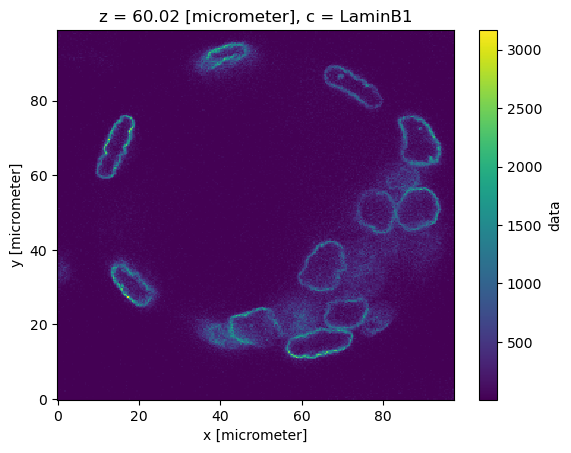

In [11]:
dset.sel(c="LaminB1").isel(z=120)["data"].plot()

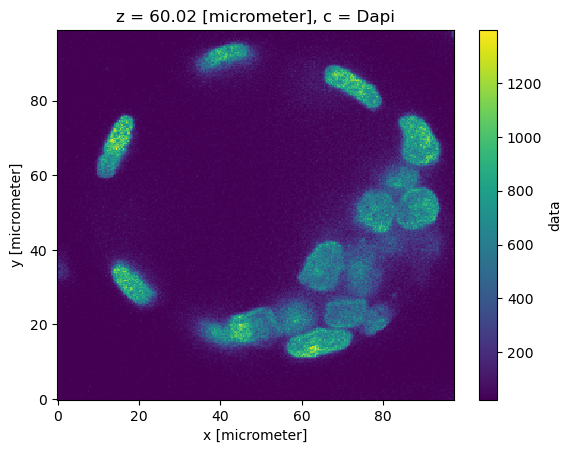

In [12]:
dset.sel(c="Dapi").isel(z=120)["data"].plot()

## Reading a different resolution

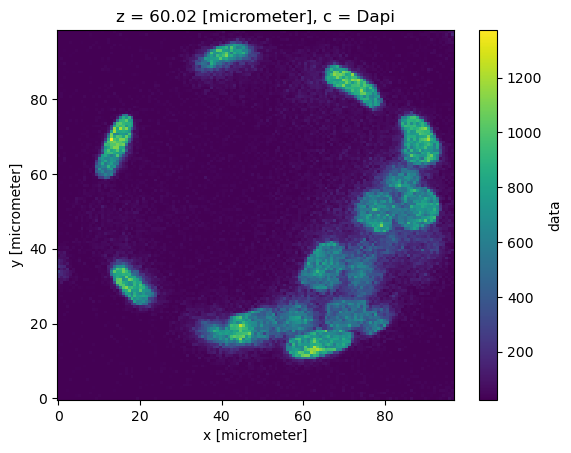

In [13]:
read_multiscale_array(zarr.open_array(url + "/1")).rename("data").to_dataset().assign_coords({"c": channel_names}).sel(c="Dapi").isel(z=120)["data"].plot()

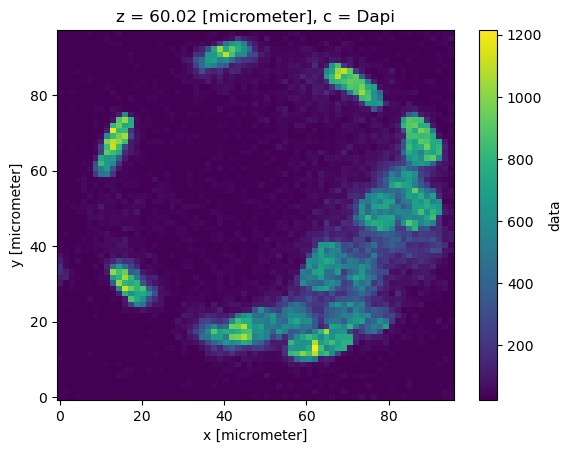

In [14]:
read_multiscale_array(zarr.open_array(url + "/2")).rename("data").to_dataset().assign_coords({"c": channel_names}).sel(c="Dapi").isel(z=120)["data"].plot()

## Using hvplot to visualize Bio-imaging data

In [15]:
import holoviews as hv
import hvplot.xarray
import numpy as np

In [29]:
dset.z

<xarray.DataArray 'z' (z: 236)> Size: 2kB
array([  0.      ,   0.500203,   1.000405, ..., 116.547195, 117.047397,
       117.5476  ])
Coordinates:
  * z        (z) float64 2kB 0.0 0.5002 1.0 1.501 ... 116.0 116.5 117.0 117.5
Attributes:
    units:    micrometer

In [30]:
dset["data"].sel(z=slice(40,120)).hvplot(x="x", y="y", cmap="RdYlGn", width=600, height=500)

:DynamicMap   [c,z]
   :Image   [x,y]   (data)

### Overlap the two channels on one plot

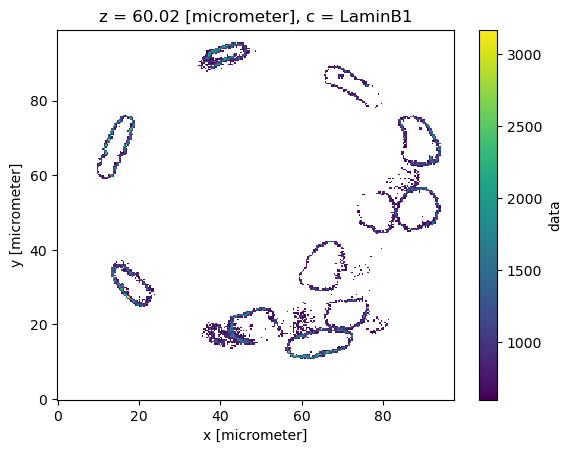

In [17]:
dset.where(dset.sel(c="LaminB1") > 600, np.nan).sel(c=["LaminB1"]).isel(z=120)["data"].plot()

In [27]:
p1 = dset.sel(c="Dapi").isel(z=120)["data"].hvplot(cmap="RdYlGn", width=600, height=500)
p2 = dset.where(dset.sel(c="LaminB1") > 600, np.nan).sel(c=["LaminB1"]).isel(z=120)["data"].hvplot(x="x", y="y", cmap="binary_r", width=600, height=500)
p1 * p2

:DynamicMap   [c]
   :Overlay
      .Image.I  :Image   [x,y]   (data)
      .Image.II :Image   [x,y]   (data)